Text(0.5, 1.0, 'Absolut income per region of airbnb accomodations in Seattle\n')

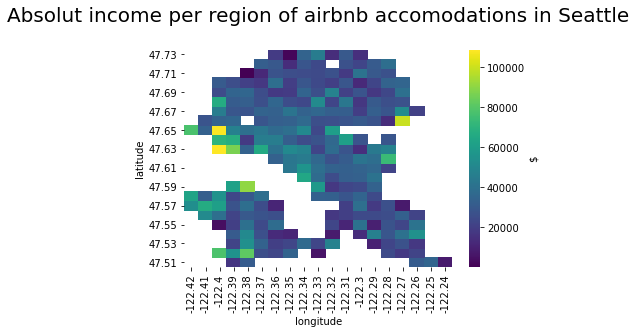

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

''' Question 2:
    Now we want to take a look in which locations the most money was generated. 
    For this step we need 2 tables: - 1 contains the details for each accomodation
                                    - 1 contains all the bookings each accomodation had during the year
'''

# Read in the two tables
df_cal = pd.read_csv('calendar.csv')
df_lis = pd.read_csv('listings.csv')

# Round the coordinate numbers to 2 digits (see Question 1)
df_lis = df_lis[['id','latitude','longitude']].round(2)

# Change the price column from string to float (see Question 1)
df_cal['price'] = df_cal['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Drop all rows with no prices in the calendar dataframe (at these dates the accomodation was not booked)
df_cal = df_cal.dropna(subset=['price'], axis=0)

# Rename the "listing_id" to "id" to have the same id name in both dataframes
df_cal = df_cal.rename(columns={"listing_id": "id"})

# Groupby the different accomodations and sum up all the income for each accomodation
df_cal = df_cal.groupby(['id']).sum()

# Merge the two dataframes together to have the income and location in a new dataframe
df_new = pd.merge(df_cal, df_lis, on='id')

# Create a pivot table and plot it in a heatmap regarding the mean absolute prices (similar as in Question 1)
pivot = pd.pivot_table(df_new,values = 'price', aggfunc=np.mean, index = ['latitude'],columns = 'longitude')
ax = sns.heatmap(pivot,cmap = 'viridis',cbar_kws={'label': '$'})
ax.invert_yaxis()
ax.set_title('Absolut income per region of airbnb accomodations in Seattle\n',fontsize =20)